In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### virtual env

In [ ]:
!which python

### Preprocessing

In [3]:
data_folder = Path("/Users/ziru/Documents/GitHub/CMIS_1/P2-gesture-interaction/example_data/1738726494-66512")

In [5]:
data = {}
# csv文件的名字作为gesture data label
for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem    
    data[gesture_name] = pd.read_csv(gesture_file)  

In [6]:
# gesture classes
data.keys()

dict_keys(['u', 'b', 'r', 'o', 'l'])

In [7]:
data["u"]
print(type(data['u']))
#  acc: linear acceleration of the device in 3D space
# gyro: angular velocity of the device in 3D space

<class 'pandas.core.frame.DataFrame'>


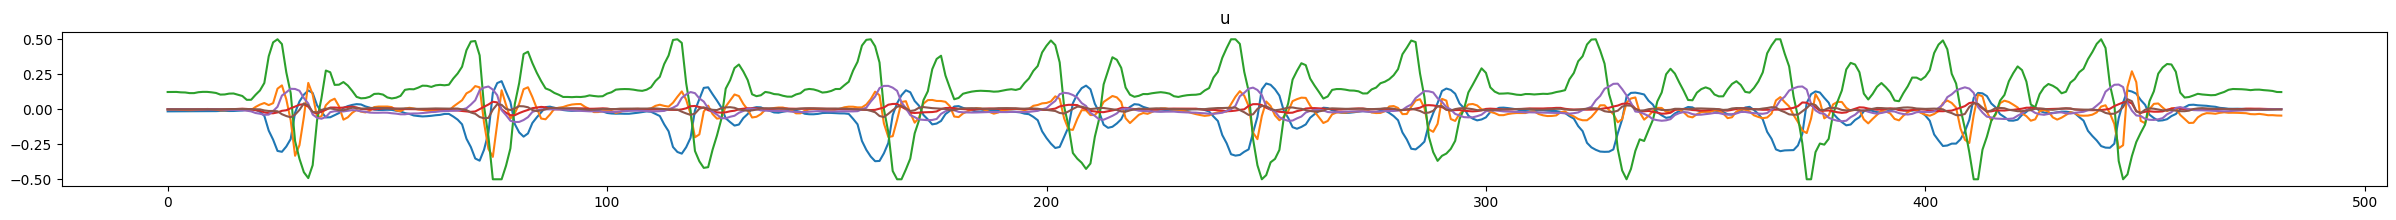

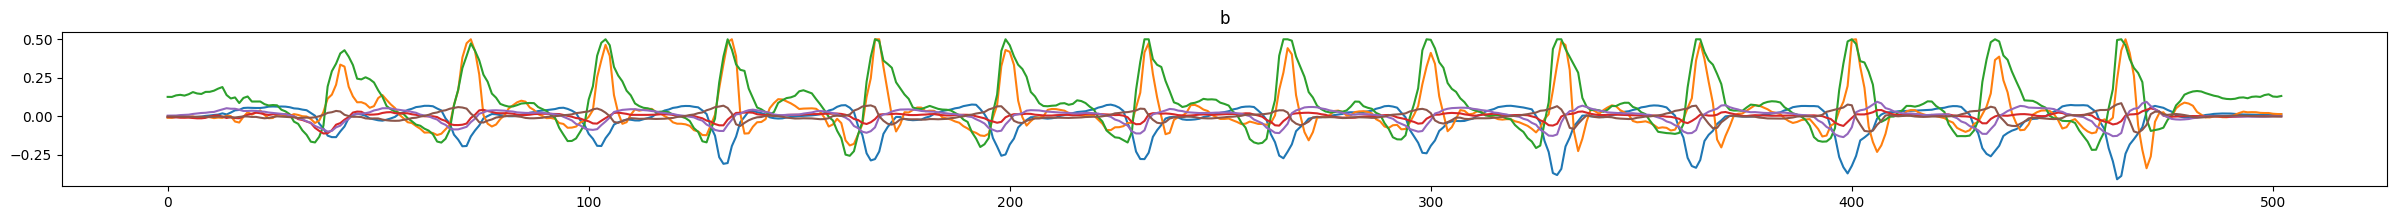

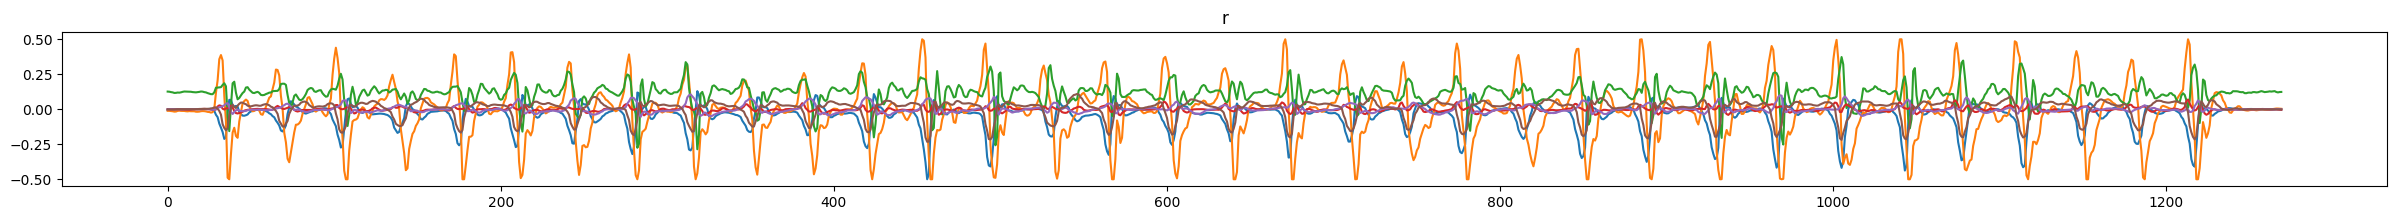

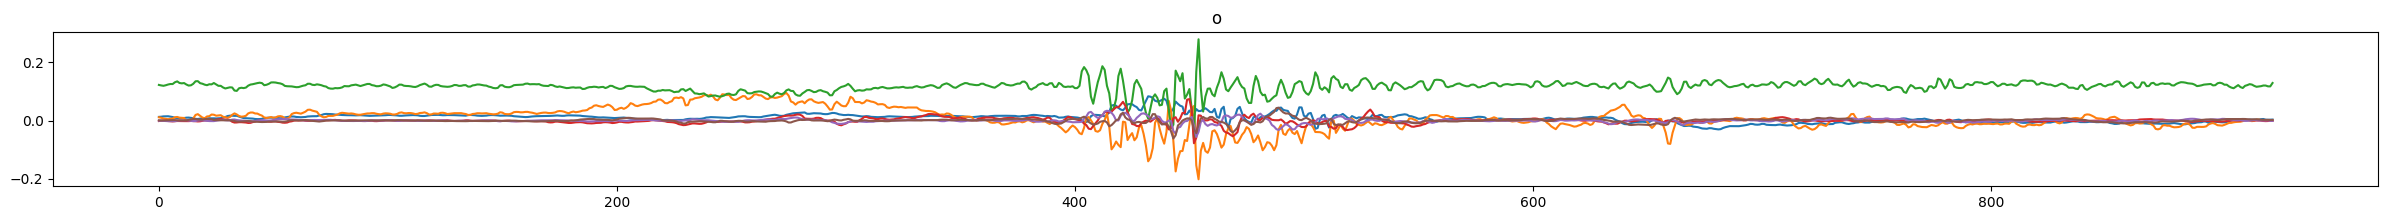

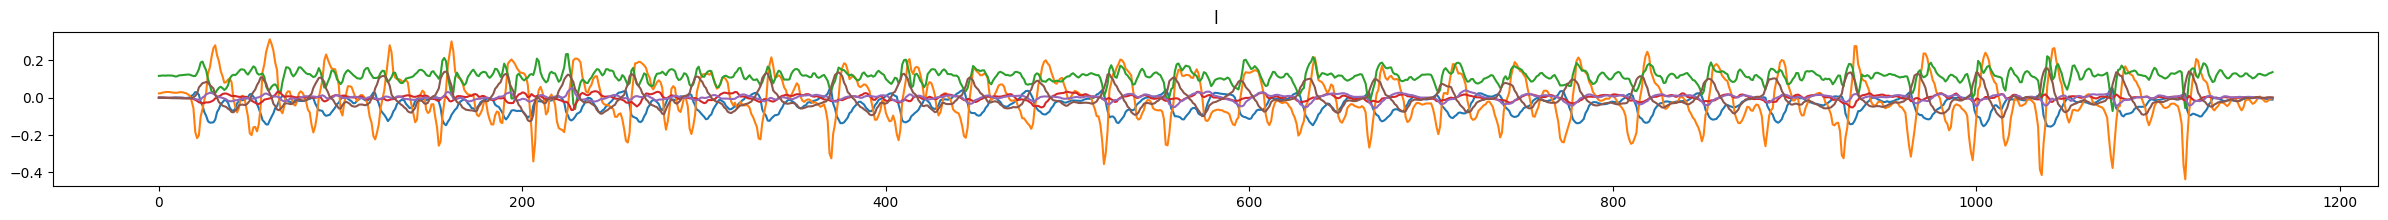

In [8]:
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 2)) # Creates a new figure with specific dimensions (30 units wide, 2 units tall)
    plt.title(gesture_name)
    plt.plot(df.values[:, :-1])# Plots all columns of the DataFrame except the last one (likely excluding 'timestamp')
    plt.show()

In [ ]:
# create windows of data, window size 50, overlap 49
window_size = 50
# window_size = 10
X = []
y = []
for gesture_name, df in data.items():   # item is used to return each key-value pair in the dictionary as a list of tuples
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(4093, 300) (4093,)


### Training

In [10]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

(3274, 300) (819, 300) (3274,) (819,)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_rf = rf.predict(X_test)  # 预测标签
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

1.0
[[ 87   0   0   0   0]
 [  0 208   0   0   0]
 [  0   0 159   0   0]
 [  0   0   0 256   0]
 [  0   0   0   0 109]]


### Saving

In [12]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)
with open(model_dir / f'rf_{model_name}.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [14]:
print(model_name)

b_l_o_r_u__1740674035-9790394
